In [1]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the file path
file_path = '../data/cleaned_data.csv'

# Load the cleaned data into a DataFrame
cleaned_df = pd.read_csv(file_path)

In [17]:
# The information about cleaned_df
cleaned_df

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes),Manufacturer
0,0,-9223372036854775808,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,245107.75,208201448079117,33664962239,35521209507511,...,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0,Samsung
1,1,-9223372036854775808,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,245107.75,208201909211140,33681854413,35794009006359,...,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0,Samsung
2,2,-9223372036854775808,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,245107.75,208200314458056,33760627129,35281510359387,...,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0,Samsung
3,3,-9223372036854775808,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,245107.75,208201402342131,33750343200,35356610164913,...,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0,undefined
4,4,-9223372036854775808,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,245107.75,208201401415120,33699795932,35407009745539,...,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0,Samsung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,149991,7349883264234529792,2019-04-29 07:28:00,794.0,2019-04-30 00:36:00,523.0,61661.00,208201716588303,33762146363,35860607430880,...,295424923.0,915749.0,12036660.0,1730617.0,17269104.0,38337514.0,268231454.0,263493166.0,352656000.0,Apple
146883,149992,-9223372036854775808,2019-04-29 07:28:00,114.0,2019-04-30 07:04:00,724.0,84940.00,208201402149148,33761274518,35327007109396,...,70341448.0,1752716.0,7283344.0,954877.0,36814543.0,13742615.0,43581298.0,820617848.0,116264912.0,Apple
146884,149993,-9223372036854775808,2019-04-29 07:28:00,79.0,2019-04-30 18:22:00,512.0,125622.00,208201402072093,33626114091,35735309473406,...,623318363.0,2307959.0,12459876.0,2555578.0,26306531.0,40974659.0,571286842.0,179348636.0,666947481.0,Apple
146885,149994,-9223372036854775808,2019-04-29 07:28:00,83.0,2019-04-30 15:01:00,268.0,113545.00,208200313074099,33645655643,35155409288696,...,862796008.0,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0,922173944.0,Samsung


In [20]:
# To Dispaly cleaned_df Shape
cleaned_df.shape

(146887, 57)

In [21]:
# Columns of cleaned_df 
cleaned_df.columns


Index(['Unnamed: 0', 'Bearer Id', 'Start', 'Start ms', 'End', 'End ms',
       'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', '

Identifying the top 10 handsets used by the customers.

In [22]:
# Use value_counts to count the occurrences of each handset type and select the top 10
top_10_handset_types = cleaned_df['Handset Type'].value_counts().head(10)

# Display the top 10 handset types used by customers
top_10_handset_types


Handset Type
Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
undefined                        8820
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5150
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: count, dtype: int64

## Identify the top 3 handset manufacturers

In [23]:
# Extracting the manufacturer information from the 'Handset Type' column
cleaned_df['Manufacturer'] = cleaned_df['Handset Type'].str.split().str[0]

# Use value_counts to count the occurrences of each manufacturer and select the top 3
top_3_manufacturers = cleaned_df['Manufacturer'].value_counts().head(3)

# Display the top 3 handset manufacturers
top_3_manufacturers


Manufacturer
Apple      59069
Samsung    39902
Huawei     33754
Name: count, dtype: int64

<Axes: title={'center': 'Top Handset Manufacturer'}, ylabel='count'>

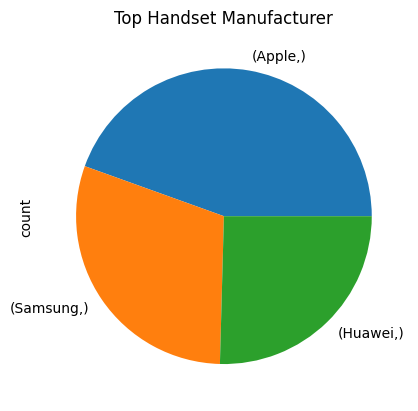

In [24]:
cleaned_df[['Handset Manufacturer']].value_counts().head(3).plot(kind='pie', title="Top Handset Manufacturer")


identify the top 5 handsets per top 3 handset manufacturer

In [9]:
# Extracting the manufacturer information from the 'Handset Type' column
cleaned_df['Manufacturer'] = cleaned_df['Handset Type'].str.split().str[0]

# Use value_counts to count the occurrences of each manufacturer and select the top 3
top_3_manufacturers = cleaned_df['Manufacturer'].value_counts().head(3)

# Iterate through the top 3 manufacturers and identify the top 5 handsets for each
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = cleaned_df[cleaned_df['Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 handsets for {manufacturer}:")
    print(top_5_handsets)
    print("\n")


Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9369
Apple iPhone 6 (A1586)     8967
Apple iPhone 7 (A1778)     6240
Apple iPhone Se (A1723)    5150
Apple iPhone 8 (A1905)     4961
Name: count, dtype: int64


Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4404
Samsung Galaxy A5 Sm-A520F      3673
Samsung Galaxy J5 (Sm-J530)     3664
Samsung Galaxy J3 (Sm-J330)     3431
Samsung Galaxy S7 (Sm-G930X)    3106
Name: count, dtype: int64


Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19373
Huawei E5180                       2062
Huawei P20 Lite Huawei Nova 3E     2000
Huawei P20                         1471
Huawei Y6 2018                      984
Name: count, dtype: int64




In [26]:
# Agregate User per Session

sessions_per_user = cleaned_df.groupby('MSISDN/Number')['MSISDN/Number'].agg('count').reset_index(name='Bearer Id').sort_values(by='Bearer Id',
        ascending=False)
sessions_per_user.rename(columns={sessions_per_user.columns[1]: 'number of xDR sessions'}, inplace=True)
sessions_per_user

,MSISDN/Number,number of xDR sessions
13379,33626320676,18
13035,33625779332,17
6353,33614892860,17
36666,33659725664,16
75561,33675877202,15
...,...,...
40613,33660669493,1
40612,33660669025,1
40610,33660668320,1
40609,33660668134,1


In [29]:
# Grouping the data by user and calculating the sum of session durations for each user
#session_duration_per_user = cleaned_df.groupby('MSISDN/Number')['Dur. (ms)'].sum()

# Displaying the aggregated information
#session_duration_per_user
session_duration_per_user = cleaned_df.groupby('MSISDN/Number').agg({'Dur. (ms)': 'mean'})
session_duration_per_user.rename(
        columns={'Dur. (ms)': 'Average session duration (ms)'}, inplace=True)
session_duration_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)


,Average session duration (ms)
MSISDN/Number,
337000037000919,245107.75
33762185850,245107.75
33762190964,245107.75
33667099979,245107.75
33762199147,245107.75
33667078134,245107.75
33667077911,245107.75
33762213743,245107.75
33646337581,245107.75


In [34]:
# Total Data Volume Analysis

cleaned_df['Total UL (Bytes)'] = cleaned_df['Total UL (Bytes)'].astype("int64")
cleaned_df['Total DL (Bytes)'] = cleaned_df['Total DL (Bytes)'].astype("int64")
cleaned_df['Total Data Volume (Bytes)'] = cleaned_df['Total Data Volume (Bytes)'].astype("int64")
total_data = cleaned_df.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data.nlargest(105716, 'Total Data Volume (Bytes)')


,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,689483001,8156743493,8846226494
33760536639,703478581,7811295382,8514773963
33625779332,729577380,7770043342,8499620722
33626320676,669650721,7301516540,7971167261
33675877202,581568792,7309541816,7891110608
...,...,...,...
33675475328,23503704,14518653,38022357
33782507973,26623910,11305331,37929241
33666684512,24544016,9455608,33999624


In [37]:
# Total data volumne of each application per user
apps_total = cleaned_df.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
apps_total.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33614892860,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09,8846226494
33760536639,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09,8514773963
33625779332,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09,8499620722
33626320676,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09,7971167261
33675877202,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09,7891110608
33659725664,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09,7705862783
33666464084,18629986.0,89320737.0,25557139.0,227336012.0,214416926.0,6.646303e+09,4.349141e+09,7308500938
33760413819,20777205.0,82738720.0,25576965.0,303169107.0,318347546.0,6.268620e+09,4.101645e+09,7132370514
33664712899,19390599.0,90389372.0,21426007.0,276834013.0,251798809.0,6.103856e+09,3.976960e+09,6872336637


In [40]:
# Separating Numerical Columns
df_float = cleaned_df.select_dtypes(include=[float])
df_int = cleaned_df.select_dtypes(include=[int])

# Combining Numerical Columns into a List:

df = cleaned_df
number_array = df_float.columns.to_list() + df_int.columns.to_list()
number_array

# Standardizing Features:
# features is assigned the list of column names (number_array).
features = number_array
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [41]:
# Principal Component Analysis (PCA) to reduce the dimensionality of your standardized features (x) to 20 principal components
number = 20
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf
#The resulting DataFrame principal Df contains the principal components, 
# and each column corresponds to one of the 20 principal components.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.701708,1.213582,-1.040160,1.720280,0.922635,-2.822373,-0.638869,-0.650301,1.244441,0.428117,-1.140477,-0.878978,-1.238148,-0.431906,0.070811,0.164489,0.522470,0.475582,-0.451224,2.310666
1,-2.416598,-1.674647,2.975654,2.311221,-0.012371,0.422201,-2.178596,0.735794,-0.196098,-1.410220,-0.898182,-1.200067,0.065540,-0.011716,-1.756227,1.040074,-0.448645,-1.520820,-0.677465,0.069154
2,-2.501607,1.532400,-0.078414,2.251226,0.282636,-0.651607,1.642786,-0.331066,0.636763,-2.836116,-0.825047,-1.073610,0.608870,-1.038520,-0.431859,-0.071763,0.339749,-0.330313,-0.149306,-0.989359
3,-2.629694,-3.188485,0.534438,3.225405,0.151593,2.230027,1.287700,-1.268965,-0.315994,-0.511232,-0.985170,-1.164607,0.514367,-0.366378,0.395460,-0.347045,-0.844876,-1.543084,0.032698,0.719728
4,-2.537868,-0.881170,0.184196,2.814445,0.476909,0.942571,-0.043446,-0.931631,0.382159,-0.935979,-0.910170,-0.935291,-1.578635,-0.320602,-1.799578,-1.631601,0.839258,-1.038820,-0.403731,-0.027790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,-1.825214,1.230202,2.114480,-1.031016,2.284565,-0.020880,0.734404,0.802124,-1.868943,0.850273,2.192385,2.592044,-0.489099,-0.121003,-0.153135,-0.772215,-0.059091,-0.213523,1.696601,-0.470202
146883,-1.735104,3.148114,0.883956,1.857608,-1.460571,2.801814,-0.875392,-0.547315,0.278264,0.050287,2.480535,1.349335,0.501056,-0.668602,0.576410,0.143159,-1.455536,-0.490326,2.091815,-0.413762
146884,-1.814166,-1.366108,1.799788,0.243641,1.316673,-1.332138,1.545932,1.849993,-0.741752,-1.856558,2.444535,1.231503,1.082755,-0.507597,-0.410185,1.752839,-0.492431,-1.463824,0.102527,-0.168929
146885,-1.734812,-3.413645,3.141450,2.071817,-0.269045,2.073038,-0.246399,-1.212815,-0.684922,-0.350108,2.399436,1.242255,1.667487,-1.230501,0.081859,-1.041143,1.599015,-1.071760,-0.228457,1.247497


In [42]:
# Calculates the cumulative explained variance ratio using the first 20 principal components. 
# This value represents the proportion of the total variance in the original data that is retained by these 20 principal components.

pca.explained_variance_ratio_.sum()

0.8504909351555758

In [43]:
# Principal Component Analysis (PCA) to reduce the dimensionality of your standardized features (x) to 30 principal components
number = 30
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.701708,1.213582,-1.040160,1.720280,0.922635,-2.822373,-0.638869,-0.650301,1.244441,0.428118,...,-0.250426,2.150900,-1.607553,-0.141000,0.410731,-0.442045,-0.090062,0.073332,-0.066540,-0.070133
1,-2.416598,-1.674647,2.975654,2.311221,-0.012370,0.422201,-2.178596,0.735794,-0.196097,-1.410219,...,0.284841,1.937108,-1.555743,1.070509,0.982185,-0.525721,-0.167588,-0.166231,-0.020137,0.009071
2,-2.501607,1.532400,-0.078414,2.251226,0.282636,-0.651607,1.642785,-0.331067,0.636763,-2.836116,...,1.046753,1.757365,-1.705998,1.787117,1.001340,-0.509184,-0.111217,-0.115969,0.005066,0.029623
3,-2.629694,-3.188485,0.534438,3.225404,0.151592,2.230026,1.287699,-1.268965,-0.315994,-0.511231,...,0.949071,2.144217,-1.608410,-0.682552,1.054035,-0.476800,-0.089284,-0.046632,0.094749,0.022086
4,-2.537868,-0.881170,0.184196,2.814445,0.476909,0.942571,-0.043447,-0.931631,0.382159,-0.935978,...,0.702051,1.805832,-1.551239,1.160464,0.975279,-0.500813,-0.116401,-0.099356,0.025530,0.024085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,-1.825214,1.230202,2.114480,-1.031016,2.284565,-0.020880,0.734404,0.802124,-1.868943,0.850274,...,0.077914,-0.878251,1.280806,-0.800128,-0.992782,0.326482,-0.173392,0.043067,-0.029120,0.093059
146883,-1.735104,3.148114,0.883956,1.857608,-1.460571,2.801814,-0.875392,-0.547315,0.278264,0.050287,...,0.749834,0.503949,2.080530,1.309685,-0.965739,0.058361,-0.378961,0.058589,-0.026259,0.121744
146884,-1.814166,-1.366108,1.799788,0.243641,1.316673,-1.332138,1.545932,1.849993,-0.741752,-1.856559,...,0.395652,0.578183,1.902060,0.963294,-0.537580,0.023477,-0.299922,0.239801,0.061661,0.118456
146885,-1.734812,-3.413645,3.141450,2.071817,-0.269045,2.073038,-0.246399,-1.212815,-0.684922,-0.350108,...,0.827380,0.441009,1.840024,0.364664,-0.577898,0.028781,-0.355078,0.152066,0.021146,0.122250


In [44]:
# Calculates the cumulative explained variance ratio using the first 20 principal components. 
# This value represents the proportion of the total variance in the original data that is retained by these 20 principal components.

pca.explained_variance_ratio_.sum()

0.9919072222216359

In [45]:
number = 40
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf
#Setting the dimension number to 40

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-2.701708,1.213582,-1.040160,1.720280,0.922635,-2.822373,-0.638869,-0.650301,1.244441,0.428118,...,-0.010158,-0.020821,0.000884,0.018485,-0.006590,0.012217,-0.000233,4.549838e-07,4.640391e-15,9.984859e-15
1,-2.416598,-1.674647,2.975654,2.311221,-0.012370,0.422201,-2.178596,0.735794,-0.196097,-1.410219,...,0.013221,-0.027092,-0.311530,0.044190,0.215312,0.050055,0.000371,6.668941e-07,4.265144e-14,-1.881904e-14
2,-2.501607,1.532400,-0.078414,2.251226,0.282636,-0.651607,1.642785,-0.331067,0.636763,-2.836116,...,0.019892,-0.021163,-0.239966,0.038353,0.137409,0.027405,-0.000711,6.115085e-07,9.107561e-15,1.814690e-14
3,-2.629694,-3.188485,0.534438,3.225404,0.151592,2.230026,1.287699,-1.268965,-0.315994,-0.511231,...,-0.044990,0.003599,0.041446,0.014571,0.046200,-0.010794,0.000222,3.925298e-07,-1.029315e-14,-1.625985e-14
4,-2.537868,-0.881170,0.184196,2.814445,0.476909,0.942571,-0.043447,-0.931631,0.382159,-0.935978,...,0.007483,-0.016014,-0.188085,0.034243,0.116938,0.034089,-0.000159,6.051800e-07,-3.455429e-14,-2.283858e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,-1.825214,1.230202,2.114480,-1.031016,2.284565,-0.020880,0.734404,0.802124,-1.868943,0.850274,...,0.005151,-0.004837,-0.051527,-0.037531,-0.007307,-0.001871,0.000842,-2.304512e-06,2.228957e-16,3.739510e-16
146883,-1.735104,3.148114,0.883956,1.857608,-1.460571,2.801814,-0.875392,-0.547315,0.278264,0.050287,...,0.014453,0.002269,-0.032210,-0.038333,-0.010172,-0.008202,0.000358,-9.228983e-07,-3.311454e-17,-1.088325e-17
146884,-1.814166,-1.366108,1.799788,0.243641,1.316673,-1.332138,1.545932,1.849993,-0.741752,-1.856559,...,0.015175,0.015994,-0.009886,-0.047462,-0.006758,-0.005013,0.000048,1.072111e-06,-2.214761e-16,-4.713575e-16
146885,-1.734812,-3.413645,3.141450,2.071817,-0.269045,2.073038,-0.246399,-1.212815,-0.684922,-0.350108,...,0.006780,0.018535,-0.026571,-0.044347,0.013703,-0.009682,0.000714,4.027830e-06,-1.251302e-16,1.318304e-16


In [46]:
pca.explained_variance_ratio_


array([1.96534811e-01, 8.50819675e-02, 5.42540011e-02, 4.35310556e-02,
       4.28769500e-02, 4.27936760e-02, 4.25740909e-02, 4.22138209e-02,
       4.20599480e-02, 3.09964117e-02, 2.95200958e-02, 2.48566249e-02,
       2.38847832e-02, 2.16437799e-02, 2.14709769e-02, 2.13401771e-02,
       2.13083019e-02, 2.12868953e-02, 2.11909077e-02, 2.10716608e-02,
       2.09033391e-02, 1.94420328e-02, 1.89553003e-02, 1.86588507e-02,
       1.75253195e-02, 1.25624920e-02, 1.15129072e-02, 9.62526411e-03,
       8.24625648e-03, 3.98452443e-03, 2.73999164e-03, 2.31507243e-03,
       1.36727942e-03, 7.82874453e-04, 5.20534064e-04, 3.66463829e-04,
       5.61947469e-07, 2.89234553e-13, 1.94313636e-33, 1.94313636e-33])

In [47]:
pca.explained_variance_ratio_.sum()


1.0000000000000002